Enter the contact rate
0.0001


Enter the conversion rate from the latent to the infected state
0.01


Enter the recovery rate
0.5


Enter the initial probability of infection
0.05


0
1
2
3
4


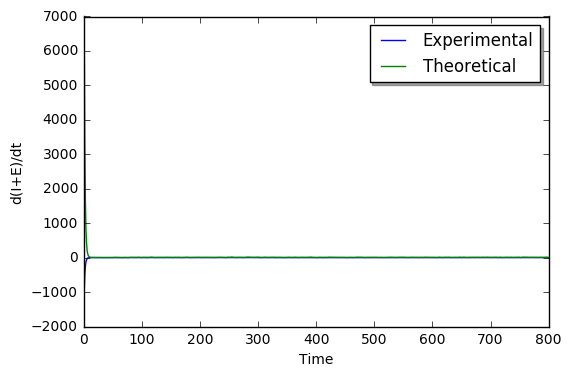

In [36]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np

# The basic parameters of the system may now be inputted. For this model we are going to assume a static 
# population size. The disease will not affect the population size and nor will natural births or deaths.
# We will prompt the entry of I = the disease spread rate between an infected and a susceptible individual,
# D = the conversion rate between the latent exposed state and the infected state and finally R = the recovery
# rate 

STot = [];
ETot = [];
ITot = [];
RTot = [];
IsumT = [];
R0Tot = [];
R0STot = [];

print('Enter the contact rate');
I = float(input());
print('\n')
print('Enter the conversion rate from the latent to the infected state');
D = float(input());
print('\n')
print('Enter the recovery rate');
R = float(input());
print('\n')

# For this model a percentage of the population will start as infected.

print('Enter the initial probability of infection');
I0 = float(input());
print('\n')

# To begin we will initialize four 1000 by 1000 matrices. The t0 matrix represents the microstate before 
# the nth change, while the t1 matrix represents the microstate after the nth change. The hessiandelta
# matrix calculates the energy delta for a localization of the microstate. The change matrix
# represents the probability of each element of the t0 microstate switching states. It should 
# populate with numbers on [0,1] once the transition probabilities have been calculated.

# we will be looking at the average numbers of various trials. We will take the average over 200 trials.

for p in range (0,5):
    
    t0microstate = [[0 for x in range (200)] for x in range (200)]; 
    t1microstate = [[0 for x in range (200)] for x in range (200)];
    changematrix = [[0 for x in range (200)] for x in range (200)];
    iteration = [];
    N = 40000
    SPop = [];
    EPop = [];
    IPop = [];
    RPop = [];
    Time = [];
    Isum = [];
    R0 = [];
    R0S = [];
    SPop.append(0);
    EPop.append(0);
    IPop.append(0);
    RPop.append(0);
    Time.append(0);
    Isum.append(0);
    R0.append(0);
    R0S.append(0);


    for i in range (0,200):
        for j in range (0,200):
        
            a = random.random();
        
            if (a < I0):
                t0microstate[i][j] = 2;
                IPop[0] += 1;
        
            else:
                t0microstate[i][j] = 0;            
            
    SPop[0] = N - IPop[0] ;
    Isum[0] = IPop[0];
    
    t1microstate = t0microstate;

    #imgplot = plt.imshow(t0microstate);
    #imgplot.set_cmap('hot');
    #plt.colorbar();
    #plt.show();

    #print('Supsceptible Population = ',SPop[0],'\n');
    #print('Exposed Population = ',EPop[0],'\n');
    #print('Infected Population = ',IPop[0],'\n');
    #print('Recovered Population = ',RPop[0],'\n');

    for k in range (0,800):
    
        SPop.append(SPop[k]);
        EPop.append(EPop[k]);
        IPop.append(IPop[k]);
        RPop.append(RPop[k]);
        Time.append(k+1);
        Isum.append(Isum[k]);
    
        for i in range (0,200):
            for j in range (0,200):
            
                if (t0microstate[i][j] == 1):
                    changematrix[i][j] = D;
                    a = random.random();
                    if a <= D:
                        t1microstate[i][j] += 1;
                        IPop[k+1] += 1;
                        EPop[k+1] += -1;
                    
            
                if (t0microstate[i][j] == 2):
                    changematrix[i][j] = R;
                    a = random.random();
                    if a <= R:
                        t1microstate[i][j] += 1;
                        RPop[k+1] += 1;
                        IPop[k+1] += -1;
            
                if (t0microstate[i][j] == 3):
                    changematrix[i][j] = 0;

# Here we establish the periodic boundary conditions. Only the transition from the susceptible state to the 
# exposed state is reliant on surrounding values.

                if (t0microstate[i][j] == 0):
                    n=0;
                    if (1<=i<=198):
                        if (1<=j<=198):
                            if (t0microstate[i-1][j] == 2):
                                n += 1;
                            if (t0microstate[i+1][j] == 2):
                                n += 1;
                            if (t0microstate[i][j+1] == 2):
                                n += 1;
                            if (t0microstate[i][j-1] == 2):
                                n += 1;
                            if (t0microstate[i-1][j+1] == 2):
                                n += 1;
                            if (t0microstate[i-1][j-1] == 2):
                                n += 1;
                            if (t0microstate[i+1][j+1] == 2):
                                n += 1;
                            if (t0microstate[i+1][j-1] == 2):
                                n += 1;
                        if (j == 0):
                            if (t0microstate[i-1][0] == 2):
                                n += 1;
                            if (t0microstate[i+1][0] == 2):
                                n += 1;
                            if (t0microstate[i][1] == 2):
                                n += 1;
                            if (t0microstate[i][199] == 2):
                                n += 1;
                            if (t0microstate[i-1][1] == 2):
                                n += 1;
                            if (t0microstate[i-1][199] == 2):
                                n += 1;
                            if (t0microstate[i+1][1] == 2):
                                n += 1;
                            if (t0microstate[i+1][199] == 2):
                                n += 1;
                        if (j == 199):
                            if (t0microstate[i-1][j] == 2):
                                n += 1;
                            if (t0microstate[i+1][j] == 2):
                                n += 1;
                            if (t0microstate[i][0] == 2):
                                n += 1;
                            if (t0microstate[i][j-1] == 2):
                                n += 1;
                            if (t0microstate[i-1][0] == 2):
                                n += 1;
                            if (t0microstate[i-1][j-1] == 2):
                                n += 1;
                            if (t0microstate[i+1][0] == 2):
                                n += 1;
                            if (t0microstate[i+1][j-1] == 2):
                                n += 1;
                    if (i==0):
                        if (1<=j<=198):
                            if (t0microstate[199][j] == 2):
                                n += 1;
                            if (t0microstate[i+1][j] == 2):
                                n += 1;
                            if (t0microstate[i][j+1] == 2):
                                n += 1;
                            if (t0microstate[i][j-1] == 2):
                                n += 1;
                            if (t0microstate[199][j+1] == 2):
                                n += 1;
                            if (t0microstate[199][j-1] == 2):
                                n += 1;
                            if (t0microstate[i+1][j+1] == 2):
                                n += 1;
                            if (t0microstate[i+1][j-1] == 2):
                                n += 1;
                        if (j==0):
                            if (t0microstate[199][j] == 2):
                                n += 1;
                            if (t0microstate[i+1][j] == 2):
                                n += 1;
                            if (t0microstate[i][j+1] == 2):
                                n += 1;
                            if (t0microstate[i][199] == 2):
                                n += 1;
                            if (t0microstate[199][j+1] == 2):
                                n += 1;
                            if (t0microstate[199][199] == 2):
                                n += 1;
                            if (t0microstate[i+1][j+1] == 2):
                                n += 1;
                            if (t0microstate[i+1][199] == 2):
                                n += 1;
                        if (j == 199):
                            if (t0microstate[199][j] == 2):
                                n += 1;
                            if (t0microstate[i+1][j] == 2):
                                n += 1;
                            if (t0microstate[i][0] == 2):
                                n += 1;
                            if (t0microstate[i][j-1] == 2):
                                n += 1;
                            if (t0microstate[199][0] == 2):
                                n += 1;
                            if (t0microstate[199][j-1] == 2):
                                n += 1;
                            if (t0microstate[i+1][0] == 2):
                                n += 1;
                            if (t0microstate[i+1][j-1] == 2):
                                n += 1;

                    if (i==199):
                        if (1<=j<=198):
                            if (t0microstate[i-1][j] == 2):
                                n += 1;
                            if (t0microstate[0][j] == 2):
                                n += 1;
                            if (t0microstate[i][j+1] == 2):
                                n += 1;
                            if (t0microstate[i][j-1] == 2):
                                n += 1;
                            if (t0microstate[i-1][j+1] == 2):
                                n += 1;
                            if (t0microstate[i-1][j-1] == 2):
                                n += 1;
                            if (t0microstate[0][j+1] == 2):
                                n += 1;
                            if (t0microstate[0][j-1] == 2):
                                n += 1;
                        if (j == 0):
                            if (t0microstate[i-1][j] == 2):
                                n += 1;
                            if (t0microstate[0][j] == 2):
                                n += 1;
                            if (t0microstate[i][j+1] == 2):
                                n += 1;
                            if (t0microstate[i][199] == 2):
                                n += 1;
                            if (t0microstate[i-1][j+1] == 2):
                                n += 1;
                            if (t0microstate[i-1][199] == 2):
                                n += 1;
                            if (t0microstate[0][j+1] == 2):
                                n += 1;
                            if (t0microstate[0][199] == 2):
                                n += 1;
                        if (j == 199):
                            if (t0microstate[i-1][j] == 2):
                                n += 1;
                            if (t0microstate[0][j] == 2):
                                n += 1;
                            if (t0microstate[i][0] == 2):
                                n += 1;
                            if (t0microstate[i][j-1] == 2):
                                n += 1;
                            if (t0microstate[i-1][0] == 2):
                                n += 1;
                            if (t0microstate[i-1][j-1] == 2):
                                n += 1;
                            if (t0microstate[0][0] == 2):
                                n += 1;
                            if (t0microstate[0][j-1] == 2):
                                n += 1;
                    for h in range(0,n):
                        changematrix[i][j] += I*(1-I)**(h);
                    a = random.random();
                    if a <= changematrix[i][j]:
                        t1microstate[i][j] += 1;
                        EPop[k+1] += 1;
                        Isum[k+1] += 1;
                        SPop[k+1] += -1;
        t0microstate = t1microstate;
        R0.append(EPop[k+1]-EPop[k]+IPop[k+1]-IPop[k]);
        R0S.append(IPop[k]*(I*SPop[k]-R));
#        print('Supsceptible Population = ',SPop[k+1],'\n');
#        print('Exposed Population = ',EPop[k+1],'\n');
#        print('Infected Population = ',IPop[k+1],'\n');
#        print('Recovered Population = ',RPop[k+1],'\n');
        
    STot.append(SPop);
    ETot.append(EPop);
    ITot.append(IPop);
    RTot.append(RPop);
    IsumT.append(Isum);
    R0Tot.append(R0);
    R0STot.append(R0S);
    print(p);
    
from __future__ import division
SAve = [sum(e)/len(e) for e in zip(*STot)];
EAve = [sum(e)/len(e) for e in zip(*ETot)];
IAve = [sum(e)/len(e) for e in zip(*ITot)];
RAve = [sum(e)/len(e) for e in zip(*RTot)];
Inf = [sum(e)/len(e) for e in zip(*IsumT)];
InfAve = [x + y for x, y in zip(EAve, IAve)];
R0Av = [sum(e)/len(e) for e in zip(*R0Tot)];
R0SAv = [sum(e)/len(e) for e in zip(*R0STot)];

#    filename = 'img'+str(k);
#    imgplot = plt.imshow(t0microstate);
#    plt.colorbar();
#    imgplot.set_cmap('hot');
#    plt.savefig(filename);
    
#plt.plot(Time,SAve,label='S');
#plt.plot(Time,EAve,label='E');
#plt.plot(Time,IAve,label='I');
#plt.plot(Time,RAve,label='R');
#legend = plt.legend(loc='best', shadow=True)
#plt.xlabel('Time')
#plt.ylabel('d(I+E)/dt')


#plt.plot(Time,InfAve);

#plt.savefig('R0<1.png');



plt.plot(Time,R0Av, label='Experimental')
plt.plot(Time,R0SAv,label='Theoretical')
legend = plt.legend(loc='best', shadow=True)
plt.xlabel('Time')
plt.ylabel('d(I+E)/dt')
plt.show()

#InfAve


    
  


